In [ ]:
!pip install nbconvert

Tempo máximo: 0.54
Tempo mínimo: 0.1


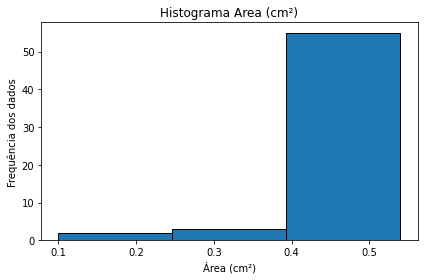

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabela = pd.read_excel("/content/Queda Livre.xlsx") #aqui irá ler os dados em Excel
# # Criando o histograma para os dados da Área


maximo_tempo = np.amax(tabela["Tempo"]) 
minimo_tempo = np.amin(tabela["Tempo"])
print("Tempo máximo:", maximo_tempo)
print("Tempo mínimo:", minimo_tempo)  

plt.hist(tabela['Tempo'],bins=3, edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Area (cm²)")

# #Podemos criar um legenda no gráfico para apontar a média
# média = 11203.23
# cor = "#FA8072"
# plt.axvline(média, color=cor, label="Média_Área: 11203.23")
# plt.legend()



# Colocando legenda nos Eixos
plt.xlabel("Área (cm²)")
plt.ylabel("Frequência dos dados")

plt.tight_layout()
 

plt.show()



**Agora podemos calcular a incerteza da Área por meio da propagação de erros utilizando a relação abaixo:**

\begin{equation}
 \boxed{σ_{A} = A \sqrt{\left (\dfrac{σ_{c}}{c} \right)^2 + \left (\dfrac{ σ_{l}}{l} \right)^2}} 
\end{equation}

In [2]:

import numpy as np 
# Derivada em g
Derivada_g = (2/(0.30)**2)
print("Derivada em G: ", Derivada_g)

# Derivada em t
Derivada_t = ((-2*0.90)/(0.30)**3)
print("Derivada em T: ", Derivada_t)

def incertezaAnalogico(Derivada_g, Derivada_t):
  #Calculando a incerteza de g no analogico
  erro_g = np.sqrt((Derivada_g * 0.0005)**2 + (Derivada_t * 0.0077)**2)
  return erro_g
print("Erro de g analogico: ", incertezaAnalogico(22.22,-66.66))


Derivada em G:  22.22222222222222
Derivada em T:  -66.66666666666667
Erro de g analogico:  0.51340222401544


**Calculando a incerteza de g no digital**

In [6]:

import numpy as np 
# Derivada em g
Derivada_g = (2/(0.42)**2)
print("Derivada em G: ", Derivada_g)

# Derivada em t
Derivada_t = ((-2*0.90)/(0.42)**3)
print("Derivada em T: ", Derivada_t)

def incertezaDigital(derivada_g, derivada_t):
  #Calculando a incerteza de g no analogico
  erro_g = np.sqrt((Derivada_g * 0.0005)**2 + (Derivada_t * 0.00081)**2)
  return erro_g
print("Erro de g digital: ", incertezaDigital(11.33,-24.29))

Derivada em G:  11.337868480725625
Derivada em T:  -24.29543245869777
Erro de g digital:  0.02047954285101034


**Calculando compatibilidade em Python**
 
 A compatibilidade  e discrepância é dada pela seguinte relação:

 \begin{equation}
    |\bar{x}-x_{ref}|< 2σ_{\bar{x}}
\end{equation}  

Sendo que se a discrepancia for menor que 2x a incerteza(σx) do valor de referência, aceita-se a compatibilidade.

Caso a discrepância caia na região entre 2x e 3x a incerteza(σx) o experimento é dado como **inconclusivo**.



**Compatibilidade no digital com o valor de g = 10.11**

In [ ]:


import numpy as np

#Valor de referencia
g_ref = 9.79
#Valor da nossa gravidade 
G_digital = 10.11
#Incerteza da nossa gravidade
Incerteza_Gravidade = 0.020

#Erro2xSigmas
DoisSigma = round(2 * Incerteza_Gravidade,2)
print("2sigma:", DoisSigma)

#Erro3xSigmas
TresSigma = round(3 * Incerteza_Gravidade,2)
print("3sigma:", TresSigma)

# Calculando a discrepancia, vamos precisar calcular o módulo
discrepancia = np.abs(round(G_digital - g_ref,2)) #Utilizando a função abs para calcular o valor absoluto, ou o módulo
print("O valor da discrepancia é :", discrepancia)

#Agora vamos avaliar a compatibilidade
if(discrepancia < DoisSigma):
   print("É compativel com o valor de referencia", discrepancia, "<" , DoisSigma)
elif(DoisSigma > discrepancia < TresSigma):
   print("O valor está na região entre 2x e 3x a incerteza(sigma), logo inconclusivo:", discrepancia, ">", DoisSigma)
else:
  print("O valor é superior que 3x a incerteza(sigma), logo incompativel :", discrepancia, ">",  TresSigma)


2sigma: 0.04
3sigma: 0.06
O valor da discrepancia é : 0.32
O valor é superior que 3x a incerteza(sigma), logo imcompativel : 0.32 > 0.06


**Compatibilidade no manual com o valor de g = 20**

In [ ]:

import numpy as np

#Valor de referencia
g_ref = 9.79
#Valor da nossa gravidade 
G_manual = 20
#Incerteza da nossa gravidade
Incerteza_Gravidade = 0.51

#Erro2xSigmas
DoisSigma = round(2 * Incerteza_Gravidade,2)
print("2sigma:", DoisSigma)

#Erro3xSigmas
TresSigma = round(3 * Incerteza_Gravidade,2)
print("3sigma:", TresSigma)

# Calculando a discrepancia, vamos precisar calcular o módulo
discrepancia = np.abs(round(G_manual - g_ref,2)) #Utilizando a função abs para calcular o valor absoluto, ou o módulo
print("O valor da discrepancia é :", discrepancia)

#Agora vamos avaliar a compatibilidade
if(discrepancia < DoisSigma):
   print("É compativel com o valor de referencia", discrepancia, "<" , DoisSigma)
elif(DoisSigma > discrepancia < TresSigma):
   print("O valor está na região entre 2x e 3x a incerteza(sigma), logo inconclusivo:", discrepancia, ">", DoisSigma)
else:
  print("O valor é superior que 3x a incerteza(sigma), logo incompativel :", discrepancia, ">",  TresSigma)


2sigma: 1.02
3sigma: 1.53
O valor da discrepancia é : 10.21
O valor é superior que 3x a incerteza(sigma), logo incompativel : 10.21 > 1.53


In [ ]:

!jupyter nbconvert --to html CalculosMecanica.ipynb
